# Вариант работы: 46.
# Выполнил: Малышев Владимир Константинович
# Группа: 3822Б1ПР3

# Функция Ламберта. $W(x)$

W-функция Ламберта определяется как обратная функция к $f(x) = xe^{x}$.
Для любого комплексного числа, допустим $x$, функцию можно представить функциональным уравнением $x=W(x)e^{W(x)}$.

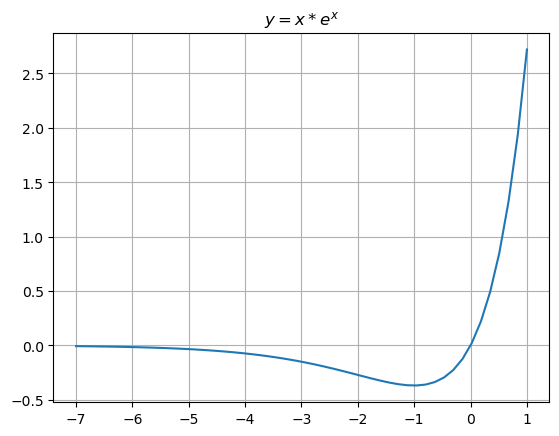

In [179]:
x = np.linspace(-7, 1)
y = x*np.exp(x)
plt.plot(x, y)
plt.title('$y=x*e^x$')
plt.grid()

Исследовав функцию понимаем, чтофункция Ламберта – многозначная. В области вещественных чисел у нее две ветви:

$W_{0}$ определенная для всех $x \ge -1/e$, при этом $y\ge -1$

$W_{-1}$ - для $-1/e\le x < 0$, при этом $y\le -1$.

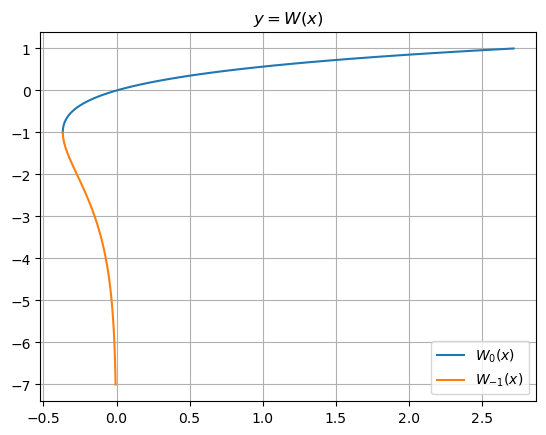

In [180]:
x = np.linspace(-7, -1)
y = x*np.exp(x)

x1 = np.linspace(-1, 1)
y1 = x1*np.exp(x1)

plt.plot(y1, x1, label='$W_{0}(x)$')
plt.plot(y, x, label='$W_{-1}(x)$')
plt.title('$y=W(x)$')
plt.legend()
plt.grid()

# Задачи:
1. Написать свою функцию `mylambert(x, k, tol)`, вычисляющую значение функции Ламберта. Функция должна решать уравнение $y = xe^x$, используя `scipy.optimize.brentq`. 

2. Сравнить `mylambert(x, k, tol)` и `lambertw(x, k, tol)` по точности и скорости работы.

Перед началом выполнения импортируем нужные нам библиотеки:

In [188]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as sopt
import scipy.special as sspec
import time

## Задача 1.

In [197]:
def urav(x, y):
    return x * np.exp(x) - y

def mylambert(x, k, tol):
    if k == 0 and x >= -np.exp(-1):
        lb = -1
        ub = max(-np.exp(-1), x)
    elif k == -1 and -np.exp(-1) <= x < 0:
        lb = min(-np.exp(-1), x)
        ub = -1
    return sopt.brentq(urav, lb, ub, args=(x,), xtol=tol)

### Определение функции, которая представляет собой уравнение $y = xe^x$
```
def urav(x, y):
    return x * np.exp(x) - y
```

### Определение функции, которая будет вычислять значение функции Ламберта для заданного $x$
```
def mylambert(x, k, tol):
```

### Устанавливаем границы для ветви $W_{0}$  $(x \ge -1/e$, $y\ge -1)$
```
if k == 0 and x >= -np.exp(-1):
        lb = -1
        ub = max(-np.exp(-1), x)
```        

### Устанавливаем границы для ветви $W_{-1}$ $(-1/e\le x < 0$, $y\le -1)$.
```
elif k == -1 and -np.exp(-1) <= x < 0:
        lb = min(-np.exp(-1), x)
        ub = -1
```

### Вызываем метод Брента для нахождения корня уравнения $y = xe^x$
```
return brentq(urav, lb, ub, args=(x,), xtol=tol)
```

### Протестриуем работостпособность функции на некоторых значениях

In [198]:
tol=1e-10
mylambert(-np.exp(-1)+1e-12,-1,tol), mylambert(-np.exp(-1),0,tol), mylambert(1e2,0,tol)

(-0.9999976683963546, -1.0, 3.38563014029005)

## Задача 2

Приведем 10 значений для функции Ламберта, учитывая ее границы, с помощью которых мы будем сравнивать функции.

In [204]:
#Набор 10 корней корней, соотвествующих границам функции Ламберта
zna=[-np.exp(-1), 1e0+1, 1e0+2, 1e0+5, 1e0+10, -2.7e-1, -3e-1, -3.3e-1, -3.6e-1]

### Сравнение времени

Создадим функцию, которая будет строить таблицу с заданными размерами и параметрами для вычисления времени работы функций ```mylambert``` и ```scipy.special.lambertw``` на основе значений $x$, который мы определили в массиве ```zna```.

In [205]:
def timesrav(k, zna):
    zag = "%-20s | %-20s | %-20s | %-10s|"
    print(zag % ('x', f'Время lambertw k={k}', f' Время mylambert k={k}', 'lambertw быстрее на'))
    print('-' * 80)
    for x in zna:
        if k == -1 and x >= 0: continue
        t1 = time.perf_counter_ns()
        lamw = sspec.lambertw(x, k)
        t1 = time.perf_counter_ns() - t1

        t2 = time.perf_counter_ns()
        mylam = mylambert(x, k, tol=1e-10)
        t2 = time.perf_counter_ns() - t2
        print(zag % (x, t1, t2, t2-t1))
        print('-' * 80)
    print('\n')

In [206]:
timesrav(0, zna)
timesrav(-1, zna)

x                    | Время lambertw k=0   |  Время mylambert k=0 | lambertw быстрее на|
--------------------------------------------------------------------------------
-0.36787944117144233 | 39900                | 28300                | -11600    |
--------------------------------------------------------------------------------
2.0                  | 6100                 | 19400                | 13300     |
--------------------------------------------------------------------------------
3.0                  | 3500                 | 17900                | 14400     |
--------------------------------------------------------------------------------
6.0                  | 3300                 | 21700                | 18400     |
--------------------------------------------------------------------------------
11.0                 | 3200                 | 22900                | 19700     |
--------------------------------------------------------------------------------
-0.27              

Последний столбец определяет, насколько (```нс-наносекунд```)  оригинальная функция из библиотеки ```scipy.special.lambertw``` была быстрее чем наша ```mylambert```

### Сравнение точности

Создадим функцию, которая будет строить таблицу с заданными размерами и параметрами для вывода значений функций ```mylambert``` и ```scipy.special.lambertw``` на основе значений $x$, который мы определили в массиве ```zna```.

In [207]:
def znasrav(k, zna):
    zag = "%-20s | %-20s | %-20s"
    print(zag % ('x', f'lambertw k={k}', f'mylambert k={k}'))
    print('-' * 70)
    for x in zna:
        if k == -1 and x >= 0: continue
        lamw = sspec.lambertw(x, k).real
        mylam = mylambert(x, k, tol=1e-10)
        print(zag % (x, lamw.real, mylam))
        print('-' * 70)
    print('\n')

In [208]:
znasrav(0, zna)
znasrav(-1, zna)

x                    | lambertw k=0         | mylambert k=0       
----------------------------------------------------------------------
-0.36787944117144233 | nan                  | -1.0                
----------------------------------------------------------------------
2.0                  | 0.8526055020137254   | 0.8526055020137255  
----------------------------------------------------------------------
3.0                  | 1.04990889496404     | 1.049908894949324   
----------------------------------------------------------------------
6.0                  | 1.4324047758983003   | 1.4324047759015226  
----------------------------------------------------------------------
11.0                 | 1.806502575505666    | 1.8065025755056663  
----------------------------------------------------------------------
-0.27                | -0.40468362160507193 | -0.404683621605019  
----------------------------------------------------------------------
-0.3                 | -0.48940222

# Вывод

По скорости работы мы можем однозначно сказать, что оригинальная функция ```scipy.special.lambertw``` делает более быстрые вычисления, нежели наша функция ```mylambret```.

Точность вычислений функций совпадает почти полностью, за ичключением того, что наша функция ```mylambret``` точнее определяет значения именно для нижней (```k=-1```) ветви функции Ламберта, нежели ```scipy.special.lambertw```.

При корне $-e^{-1}$ наша функция ```mylambret``` вычисляет значение -1.0, а функция ```scipy.special.lambertw``` не вычисляет значение вовсе.

Таким образом, нами была написана собственная функция Ламберта - ```mylambert``` , которая является практически идентичностью функции из библиотеки ```scipy.special.lambertw```.